# **1. Importing Data**

In [112]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/DM1/Project/'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(path + 'absenteeism_data.csv', delimiter=';')

# **2. Data Exploration**



## 2.1. Getting to know the dataset

In [ ]:
data.shape

(800, 22)

In [ ]:
data.count()

,0
ID,800
Reason for absence,740
Month of absence,737
Day of the week,740
Seasons,573
Days since previous absence,781
Transportation expense,800
Distance from Residence to Work,800
Estimated commute time,800
Service time,800


In [ ]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,...,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,13,...,No,1,2,Y,No,1,90,172,30,4
1,36,Unspecified,July,Tuesday,NaN,0.0,118,13,26,18,...,Yes,1,1,Y,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,18,...,No,1,0,Yes,No,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,NaN,0.0,279,5,5,14,...,No,1,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,0.0,289,36,69,13,...,No,1,2,Yes,No,1,90,172,30,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               800 non-null    int64  
 1   Reason for absence               740 non-null    object 
 2   Month of absence                 737 non-null    object 
 3   Day of the week                  740 non-null    object 
 4   Seasons                          573 non-null    object 
 5   Days since previous absence      781 non-null    float64
 6   Transportation expense           800 non-null    int64  
 7   Distance from Residence to Work  800 non-null    int64  
 8   Estimated commute time           800 non-null    int64  
 9   Service time                     800 non-null    object 
 10  Years until retirement           800 non-null    int64  
 11  Date of Birth                    800 non-null    object 
 12  Disciplinary failure  

The variable **"Seasons"** has a lot of missing values. We can get around this problem in rows in which there is no **"Seasons"** data but there is a **"Month of Absense"** variable.



In [ ]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Days since previous absence', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Date of Birth',
       'Disciplinary failure', 'Education', 'Number of children',
       'Social drinker', 'Social smoker', 'Number of pets', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

### 2.1.1. Distribution of values in features

In [ ]:
data2 = data.copy()

####Absenteeism in Hours

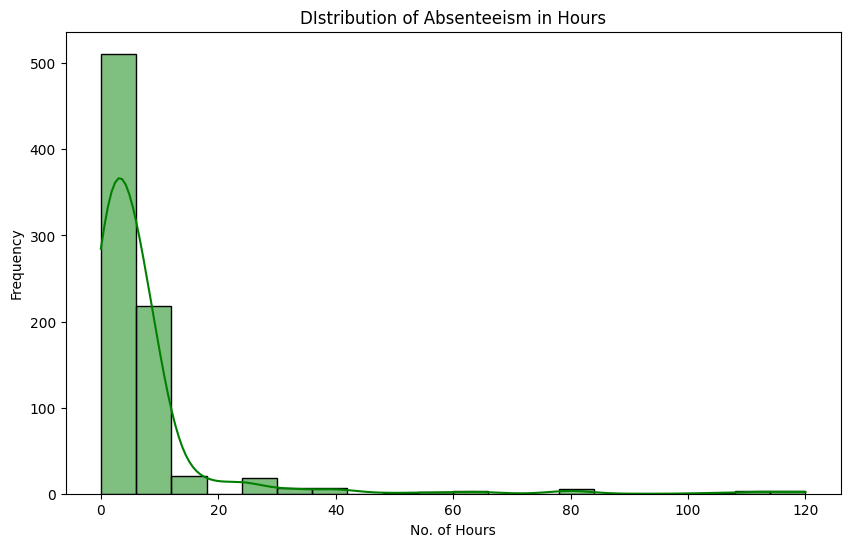

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data2['Absenteeism time in hours'], kde=True, bins=20, color='green')
plt.title('DIstribution of Absenteeism in Hours')
plt.xlabel('No. of Hours')
plt.ylabel('Frequency')
plt.show()

#### Reason for Absence

In [ ]:
data2['Reason for absence'].value_counts()

,count
Reason for absence,
Medical consultation,149
Dental consultation,112
Physiotherapy,69
Diseases of the musculoskeletal system and connective tissue,55
Unspecified,43
"Injury, poisoning and other consequences of external causes",40
Patient follow-up,38
Unjustified absence,33
Laboratory examination,31


For purposes of a easier analysis, we will split the data into **5 categories** of Reasons for absence:

1.   **Medical Appointment**;
2.   **Disease**;
3.   **Pregnancy**;
4.   **Unjustified**;
5.   **Unspecified**.

In [ ]:
def agrupar_razao(razao):
    r = str(razao).lower()

    if 'consultation' in r or 'physiotherapy' in r or 'donation' in r or 'examination' in r or 'follow-up' in r or 'abnormalities' in r:
        return 'Medical Appointment'

    elif 'diseases' in r or 'neoplasms' in r or 'injury' in r or 'disorders' in r or 'symptoms' in r or 'health' in r:
        return 'Disease'

    elif 'pregnancy' in r or 'perinatal' in r:
        return 'Pregnancy'

    elif 'unjustified' in r:
        return 'Unjustified'

    elif 'unspecified' in r:
        return 'Unspecified'

    else:
        return 'N/A'

data2['ReasonCat'] = data2['Reason for absence'].apply(agrupar_razao)

data2['ReasonCat'].value_counts()

,count
ReasonCat,
Medical Appointment,403
Disease,256
N/A,60
Unspecified,43
Unjustified,33
Pregnancy,5


In [ ]:
total_absent_hours_reason = data2.groupby('ReasonCat')['Absenteeism time in hours'].sum()

print(total_absent_hours_reason)

avg_absent_hours_reason = data2.groupby('ReasonCat')['Absenteeism time in hours'].mean()

print(avg_absent_hours_reason)

ReasonCat
Disease                3513
Medical Appointment    1349
N/A                     546
Pregnancy                22
Unjustified             240
Unspecified               0
Name: Absenteeism time in hours, dtype: int64
ReasonCat
Disease                13.722656
Medical Appointment     3.347395
N/A                     9.100000
Pregnancy               4.400000
Unjustified             7.272727
Unspecified             0.000000
Name: Absenteeism time in hours, dtype: float64


#### Month of Absence

/tmp/ipython-input-1199549458.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Month of absence', ylabel='Absenteeism time in hours'>

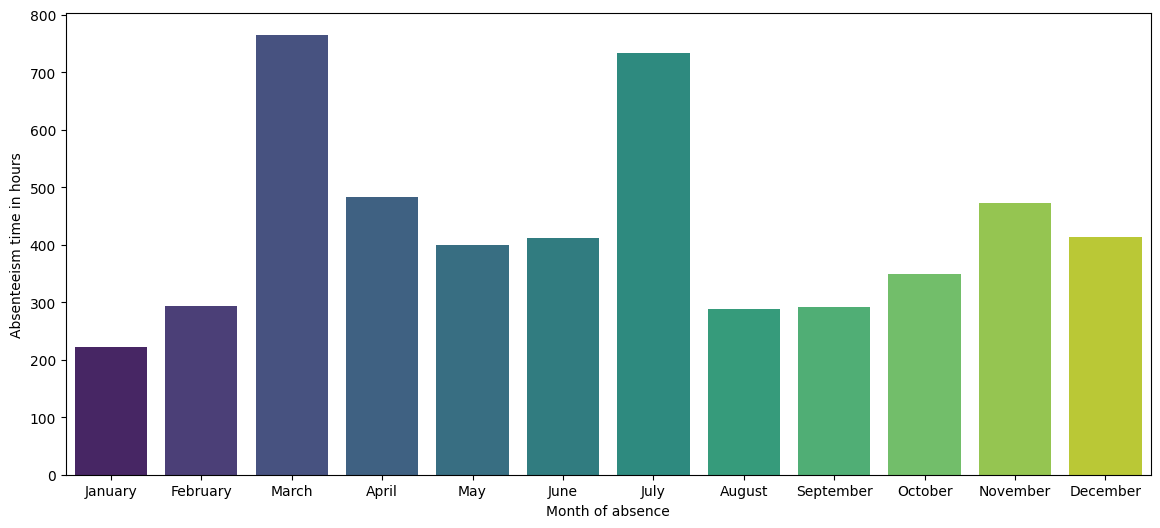

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data2['Month of absence'] = pd.Categorical(data2['Month of absence'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 6))

sns.barplot(
    data=data2,
    x='Month of absence',
    y='Absenteeism time in hours',
    estimator=sum,
    errorbar=None,
    order=month_order,
    palette='viridis')

The month in which there are more absenteeism is in **March**, and the less is in **January**.

#### Seasons

Since we have some missing values in the "Season", we will fill that with the "Month of Absence" variable. **We have to pay attention that the company in question is located in Brasil (South Hemisfere).**

In [ ]:
season_mapping = {
    'December': 'Summer', 'January': 'Summer', 'February': 'Summer',
    'March': 'Autumn', 'April': 'Autumn', 'May': 'Autumn',
    'June': 'Winter', 'July': 'Winter', 'August': 'Winter',
    'September': 'Spring', 'October': 'Spring', 'November': 'Spring'
}

data2['Seasons'] = data2['Seasons'].fillna(data2['Month of absence'].map(season_mapping))

/tmp/ipython-input-3387827095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seasons', y='Absenteeism time in hours', data=data2, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='Spectral')


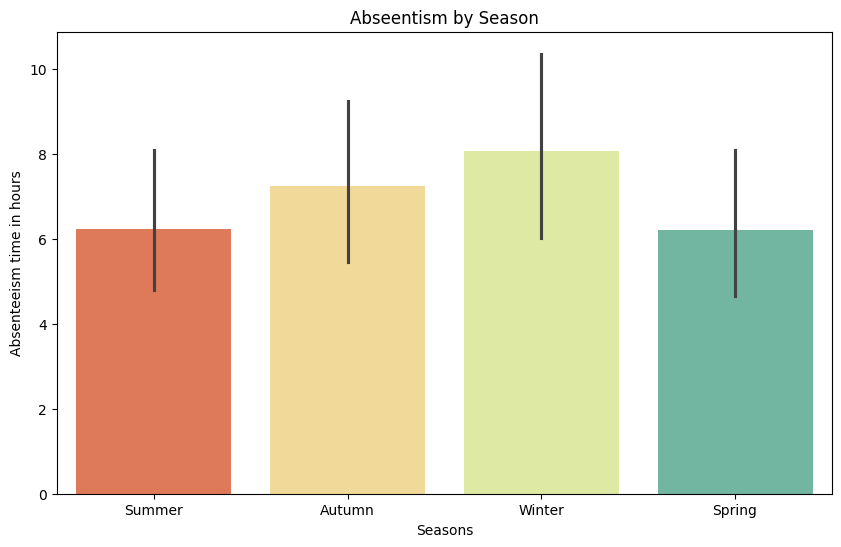

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Absenteeism time in hours', data=data2, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='Spectral')
plt.title('Abseentism by Season')
plt.show()

The season in which there are more absenteeism is in **Winter**.

#### Day of the Week

/tmp/ipython-input-1671461995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of the week', y='Absenteeism time in hours', data=data2, palette="Set2")


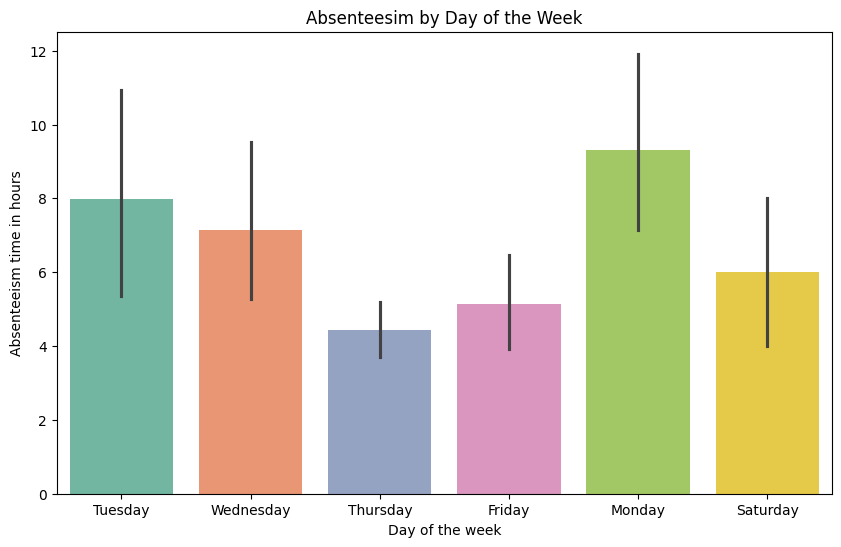

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of the week', y='Absenteeism time in hours', data=data2, palette="Set2")
plt.title('Absenteesim by Day of the Week')
plt.show()

The day of the week which has more absenteeism are "**Mondays**", and the one which as least are "**Thursdays**".

#### Service Time

In [ ]:
data2['Service time'].value_counts()

,count
Service time,
18,150
9,130
14,89
13,75
12,60
11,57
10,56
16,43
-,28


/tmp/ipython-input-1367333075.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=sum, order=years_ordered, palette='magma')
/tmp/ipython-input-1367333075.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=average, order=years_ordered, palette='viridis')


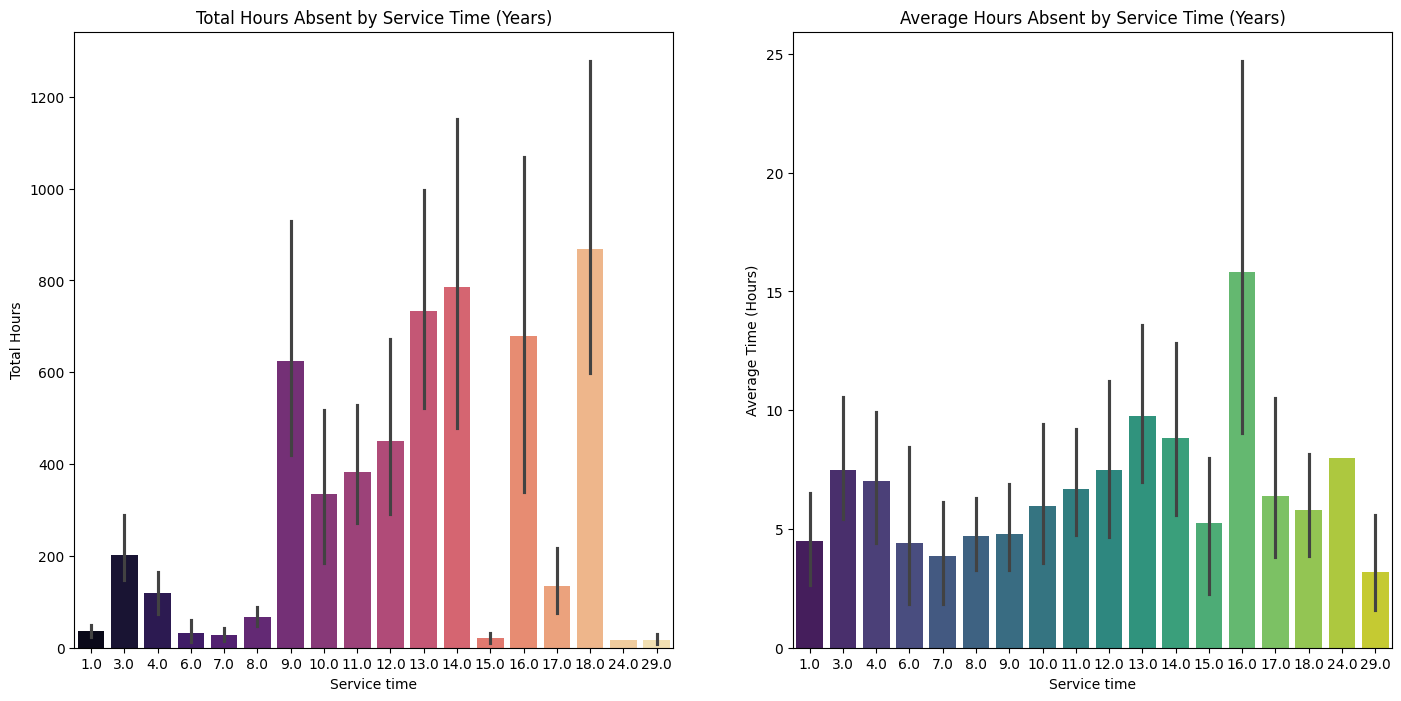

In [ ]:
from numpy import average
data2['Service time'] = pd.to_numeric(data2['Service time'], errors='coerce')

years_ordered = sorted(data2['Service time'].dropna().unique())

plt.figure(figsize=(17,8))

plt.subplot(1, 2, 1)

sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=sum, order=years_ordered, palette='magma')
plt.title('Total Hours Absent by Service Time (Years)')
plt.ylabel('Total Hours')

plt.subplot(1, 2, 2)
sns.barplot(data=data2, x='Service time', y='Absenteeism time in hours', estimator=average, order=years_ordered, palette='viridis')
plt.title('Average Hours Absent by Service Time (Years)')
plt.ylabel('Average Time (Hours)')

plt.show()

(Interpretar)

####Years Until Retirement

([<matplotlib.axis.XTick at 0x798777f1d130>,
 [Text(-1, 0, '−1'),
  Text(7, 0, '7'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38')])

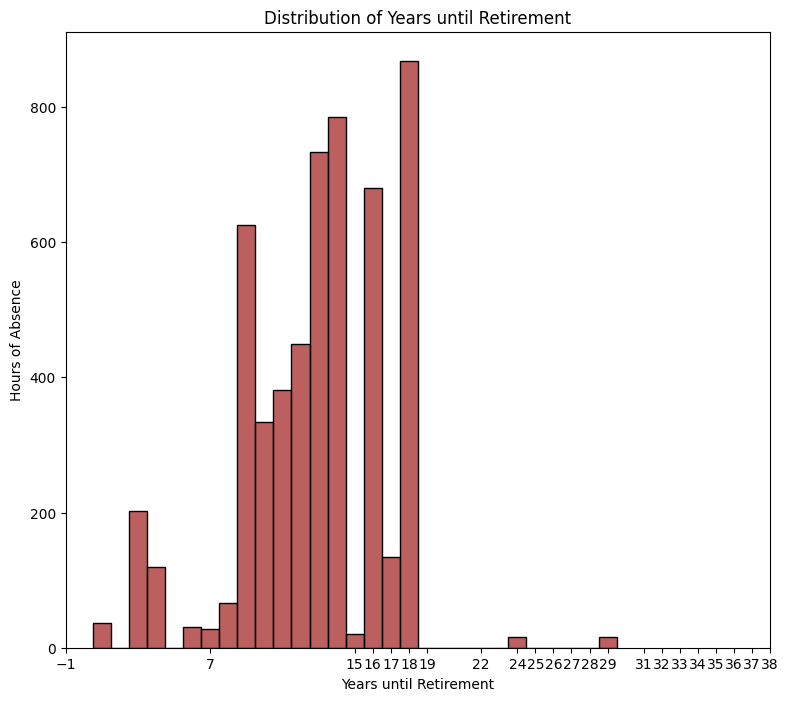

In [ ]:
years_retirement_ordered = sorted(data2['Years until retirement'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data = data2, x='Service time', weights='Absenteeism time in hours', discrete=True, color='brown')
plt.title('Distribution of Years until Retirement')
plt.xlabel('Years until Retirement')
plt.ylabel('Hours of Absence')
plt.xticks(years_retirement_ordered)

We can see that there are rows in wich the years until retirement is **"-1" (which is not possible)**. We have to deal with this in the Pre Processing Phase.

####Age

We will create a variable called **"Age"** that is easier to interpret and visualize than **"Date of Birth"**.

In [ ]:
data2['Date of Birth'] = pd.to_datetime(data2['Date of Birth'])

data2['Age'] = 2025 - data2['Date of Birth'].dt.year

In [ ]:
data2['Age'].value_counts()

,count
Age,
28,131
38,122
37,82
40,63
36,58
33,54
30,49
50,39
41,33


In [ ]:
data2['Age'].max()


58

In [ ]:
data2['Age'].min()

27

For purposes of a easier analysis, we will split the data into **4 categories** of Age:

1.   **Young adults** (< 30 years);
2.   **Established Adults** (30 - 39 years);
3.   **Middle Aged** (40 - 49 years);
4.   **Seniors** (The ones closer to retirement) (50+ years).

In [ ]:
def age_categories(idade):
    if idade < 30:
        return 'Young adults'
    elif 30 <= idade <= 39:
        return 'Established Adults'
    elif 40 <= idade <= 49:
        return 'Middle Aged'
    else:
        return 'Seniors'

data2['AgeCat'] = data2['Age'].apply(age_categories)

data2['AgeCat'].value_counts()

,count
AgeCat,
Established Adults,444
Middle Aged,161
Young adults,145
Seniors,50


In [ ]:
data2['AgeCat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: AgeCat
Non-Null Count  Dtype 
--------------  ----- 
800 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB


In [ ]:
total_absent_hours_age = data2.groupby('AgeCat')['Absenteeism time in hours'].sum()

print(total_absent_hours_age)

avg_absent_hours_age = data2.groupby('AgeCat')['Absenteeism time in hours'].mean()

print(avg_absent_hours_age)

AgeCat
Established Adults    3082
Middle Aged           1037
Seniors                786
Young adults           765
Name: Absenteeism time in hours, dtype: int64
AgeCat
Established Adults     6.941441
Middle Aged            6.440994
Seniors               15.720000
Young adults           5.275862
Name: Absenteeism time in hours, dtype: float64


#### Education

In [ ]:
education_dict = {
    1: 'High School',
    2: 'Graduate',
    3: 'Postgraduate',
    4: "Master's or PhD"
}

data2['Education'] = data2['Education'].map(education_dict)

data2['Education'].value_counts()

,count
Education,
High School,662
Postgraduate,84
Graduate,50
Master's or PhD,4


In [ ]:
total_absent_hours_educ = data2.groupby('Education')['Absenteeism time in hours'].sum()

print(total_absent_hours_educ)

avg_absent_hours_educ = data2.groupby('Education')['Absenteeism time in hours'].mean()

print(avg_absent_hours_educ)

Education
Graduate            306
High School        4912
Master's or PhD      21
Postgraduate        431
Name: Absenteeism time in hours, dtype: int64
Education
Graduate           6.120000
High School        7.419940
Master's or PhD    5.250000
Postgraduate       5.130952
Name: Absenteeism time in hours, dtype: float64


#### Number of Children

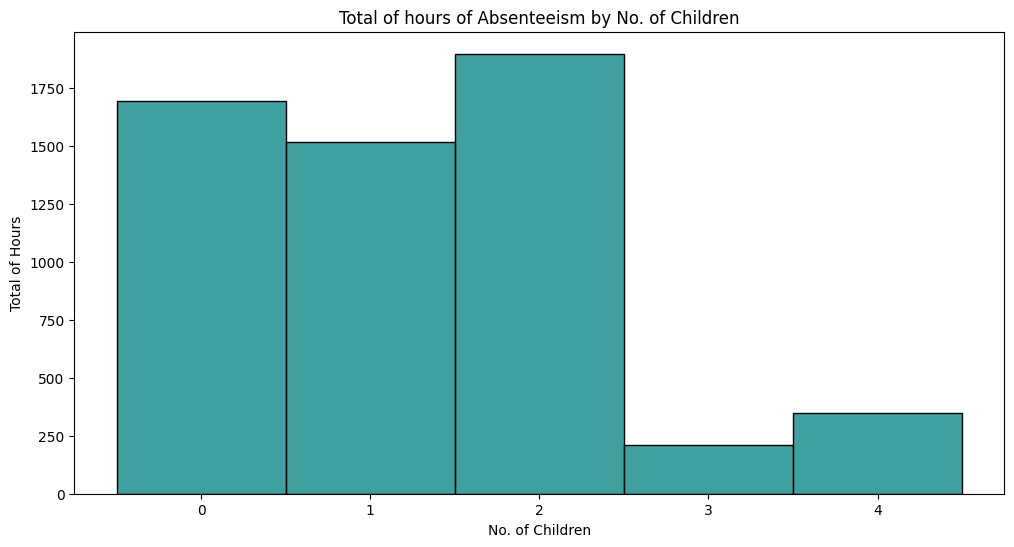

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Number of children', weights='Absenteeism time in hours', discrete=True, color='teal')

plt.title('Total of hours of Absenteeism by No. of Children')
plt.xlabel('No. of Children')
plt.ylabel('Total of Hours')
plt.xticks(range(5))
plt.show()

The workers that have **2 children** are the ones that have more total hours of absence in work.

#### Number of Pets

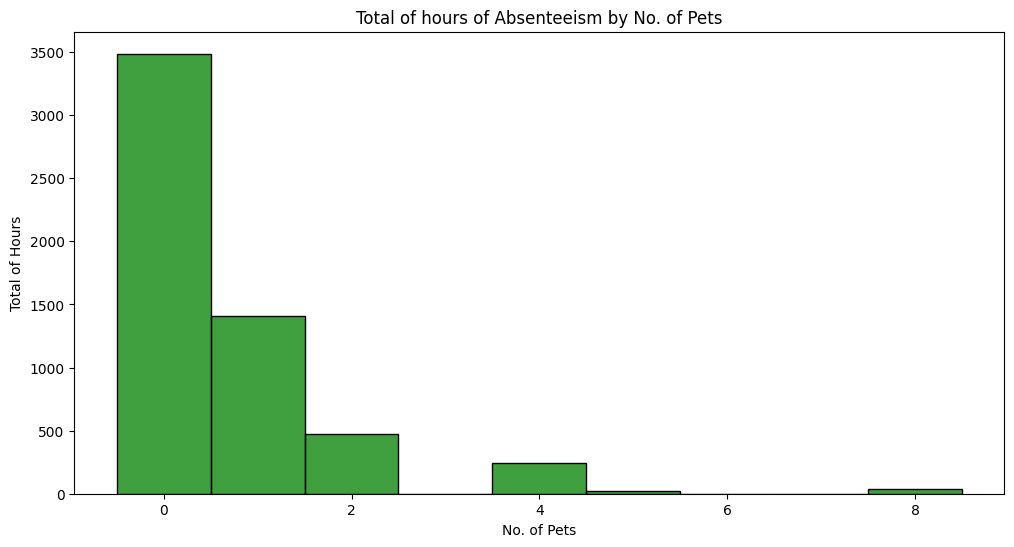

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Number of pets', weights='Absenteeism time in hours', discrete=True, color='green')

plt.title('Total of hours of Absenteeism by No. of Pets')
plt.xlabel('No. of Pets')
plt.ylabel('Total of Hours')
plt.show()

The category in which the workers have more time of absence, are the ones that have **no pets**.

#### Social Drinker

In [ ]:
data2['Social drinker'].unique()

array(['Y', 'Yes', 'No'], dtype=object)

In a first analysis, we verified that part of the data **has neither "Yes" or "No" in the field, but instead had "Y"**. We assumed that **"Y" corresponds to "Yes"**, thus we had to transform it.

In [ ]:
data2['Social drinker'] = data2['Social drinker'].replace({'Y': 'Yes', 'y': 'Yes'})

data2['Social drinker'].unique()

array(['Yes', 'No'], dtype=object)

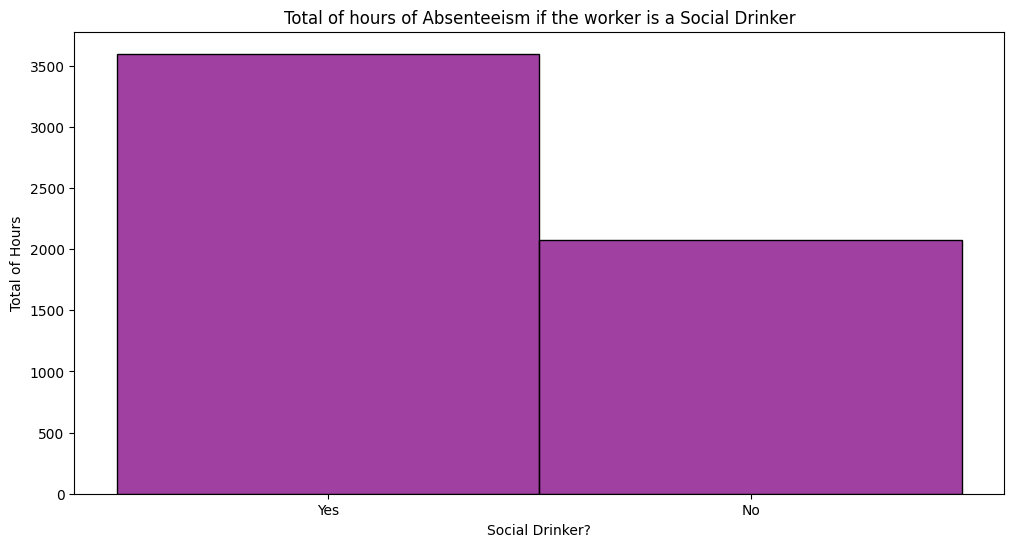

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Social drinker', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker is a Social Drinker')
plt.xlabel('Social Drinker?')
plt.ylabel('Total of Hours')
plt.show()

We observe that the **Social drinker have the more total hours absent than those who are not**.

#### Social smoker

In [ ]:
data2['Social smoker'].unique()

array(['No', 'Yes', 'Y'], dtype=object)

In a first analysis, we verified that part of the data **has neither "Yes" or "No" in the field, but instead had "Y"**. We assumed that **"Y" corresponds to "Yes"**, thus we had to transform it.

In [ ]:
data2['Social smoker'] = data2['Social smoker'].replace({'Y': 'Yes', 'y': 'Yes'})

data2['Social smoker'].unique()

array(['No', 'Yes'], dtype=object)

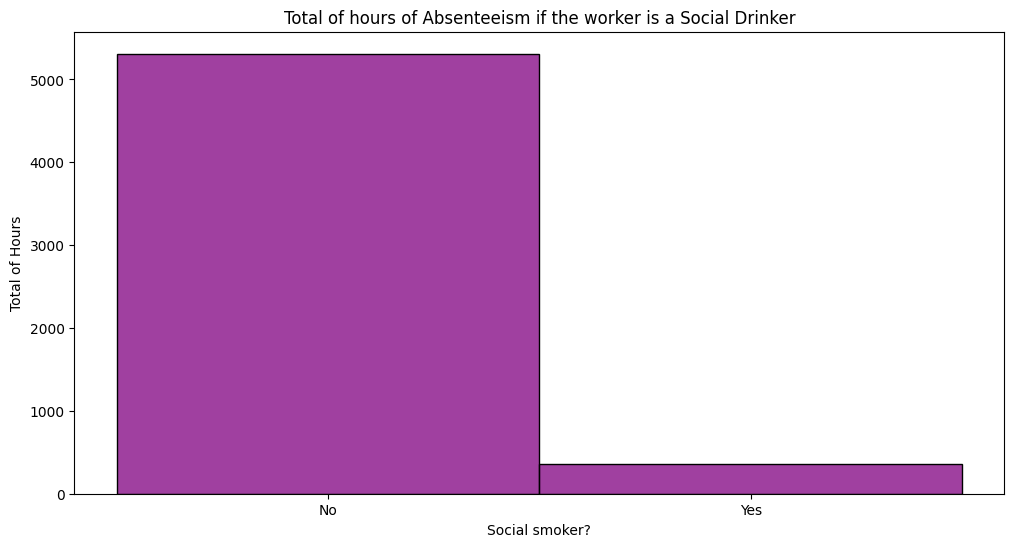

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Social smoker', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker is a Social Drinker')
plt.xlabel('Social smoker?')
plt.ylabel('Total of Hours')
plt.show()

We observe that the non **Social smokers have the more total hours absent than those who are**.

#### Disciplinary failure

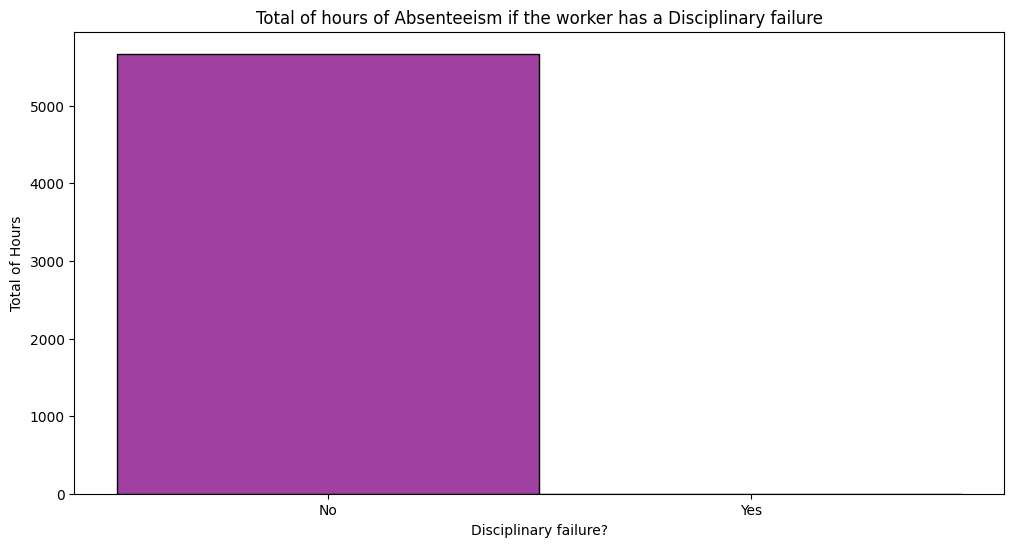

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data2, x='Disciplinary failure', weights='Absenteeism time in hours', discrete=True, color='purple')

plt.title('Total of hours of Absenteeism if the worker has a Disciplinary failure')
plt.xlabel('Disciplinary failure?')
plt.ylabel('Total of Hours')
plt.show()

In [ ]:
data2['Disciplinary failure'].value_counts()

,count
Disciplinary failure,
No,756
Yes,44


We observe that the **wide majority of absence cases don't violate workplace policies**.

#### Transportation Expense

<Axes: xlabel='Transportation expense'>

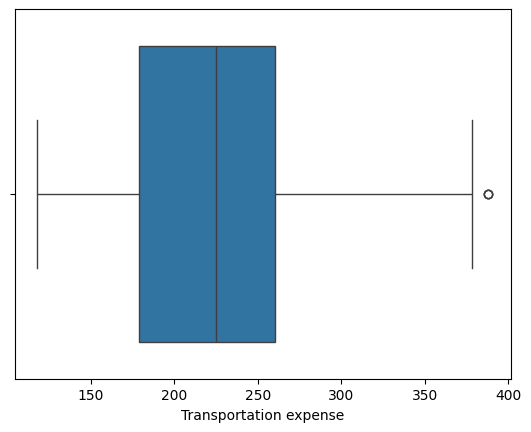

In [ ]:
sns.boxplot(data=data2, x='Transportation expense')

#### Estimated Commute Time

([<matplotlib.axis.XTick at 0x798777c305f0>,
 [Text(5, 0, '5'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(26, 0, '26'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(31, 0, '31'),
  Text(34, 0, '34'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(45, 0, '45'),
  Text(48, 0, '48'),
  Text(50, 0, '50'),
  Text(52, 0, '52'),
  Text(54, 0, '54'),
  Text(56, 0, '56'),
  Text(59, 0, '59'),
  Text(63, 0, '63'),
  Text(69, 0, '69'),
  Text(81, 0, '81'),
  Text(85, 0, '85'),
  Text(94, 0, '94'),
  Text(97, 0, '97'),
  Text(98, 0, '98'),
  Text(100, 0, '100'),
  Text(108, 0, '108'),
  Text(114, 0, '114')])

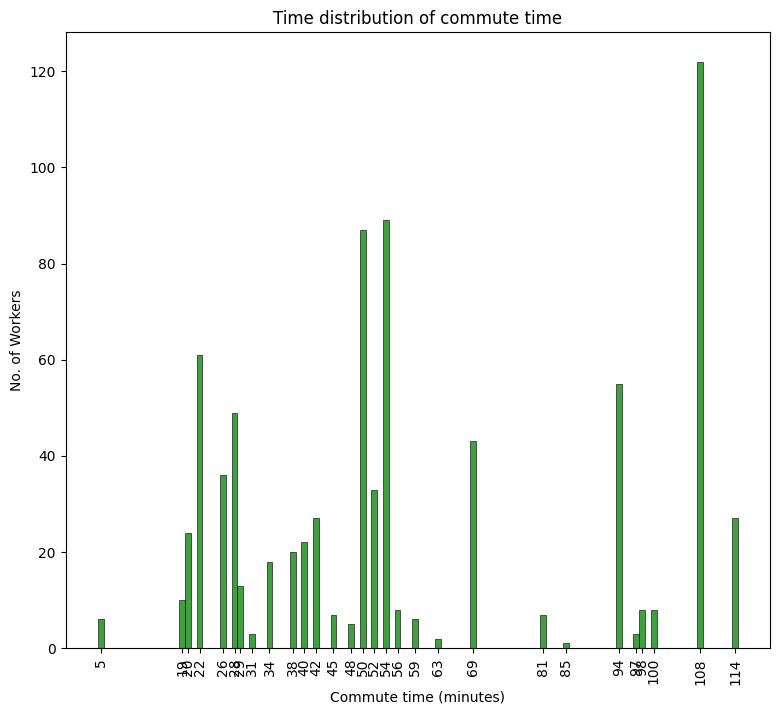

In [ ]:
time_ordered = sorted(data2['Estimated commute time'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Estimated commute time'], discrete=True, color='green')
plt.title('Time distribution of commute time')
plt.xlabel('Commute time (minutes)')
plt.ylabel('No. of Workers')
plt.xticks(time_ordered, rotation=90)

#### Distance from Residence to Work

Text(0, 0.5, 'No. of Workers')

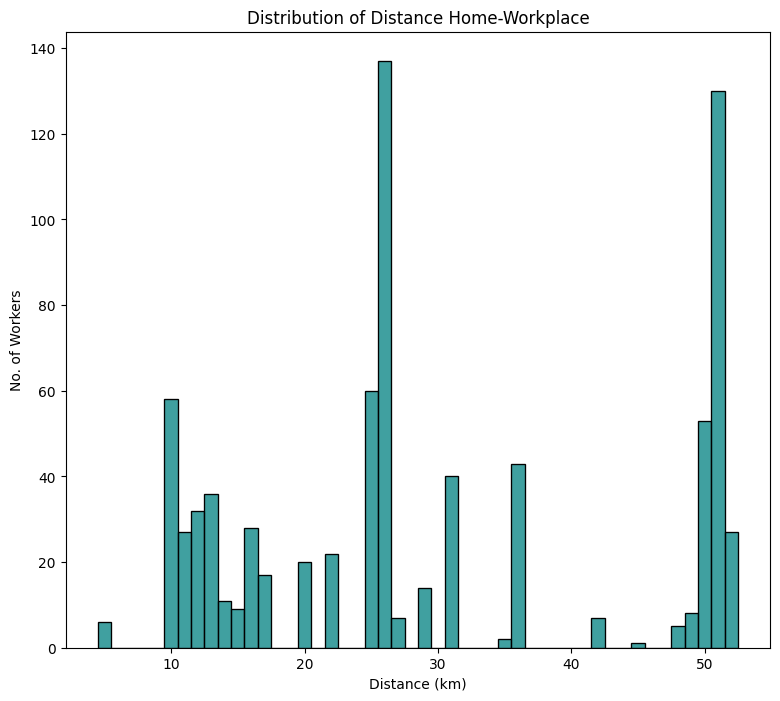

In [ ]:
distance_ordered = sorted(data2['Distance from Residence to Work'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Distance from Residence to Work'], discrete=True, color='teal')
plt.title('Distribution of Distance Home-Workplace')
plt.xlabel('Distance (km)')
plt.ylabel('No. of Workers')

#### Days since previous absence

<Axes: xlabel='Days since previous absence'>

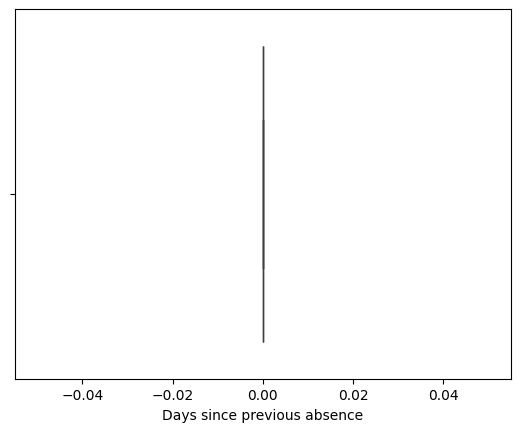

In [ ]:
sns.boxplot(data=data2, x='Days since previous absence')

In [ ]:
data2['Days since previous absence'].value_counts()

,count
Days since previous absence,
0.0,781


This variable has **no information whatsoever**.

#### Weight

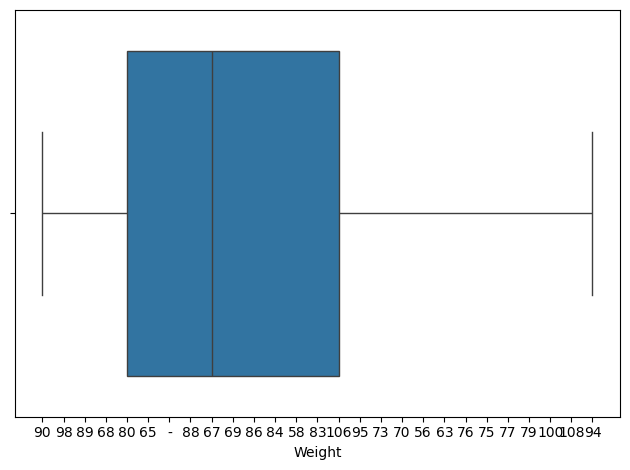

In [ ]:
sns.boxplot(data=data2, x='Weight')
plt.tight_layout()

#### Height

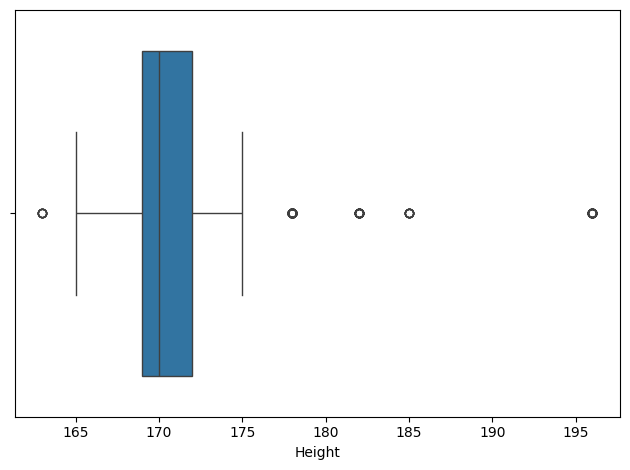

In [ ]:
sns.boxplot(data=data2, x='Height')
plt.tight_layout()


#### Body Mass Index

([<matplotlib.axis.XTick at 0x798777582c90>,
 [Text(19, 0, '19'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(38, 0, '38')])

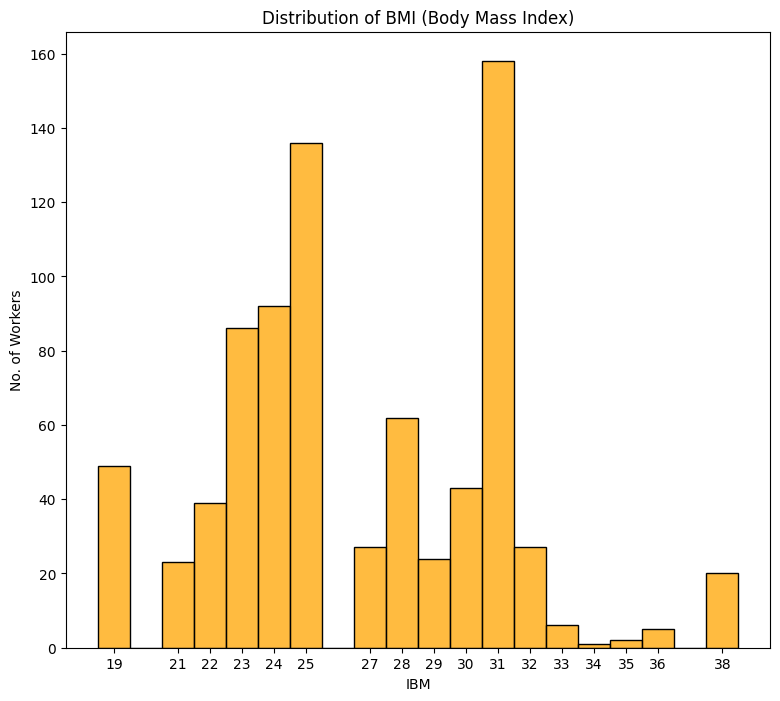

In [ ]:
bmi_ordered = sorted(data2['Body mass index'].unique())

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data2['Body mass index'], discrete=True, color='orange')
plt.title('Distribution of BMI (Body Mass Index)')
plt.xlabel('IBM')
plt.ylabel('No. of Workers')
plt.xticks(bmi_ordered)

#### Correlation Matrix

In [ ]:
numeric_data = data2.drop('ID', axis=1)
numeric_data = data2.drop('Days since previous absence', axis=1)

for col in list(numeric_data.columns):
    dtype = str(numeric_data[col].dtype)

    if dtype != 'float64' and dtype != 'int64' and dtype != 'int32':
        numeric_data = numeric_data.drop(col, axis=1)

numeric_data.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Estimated commute time', 'Service time', 'Years until retirement',
       'Number of children', 'Number of pets', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Age'],
      dtype='object')

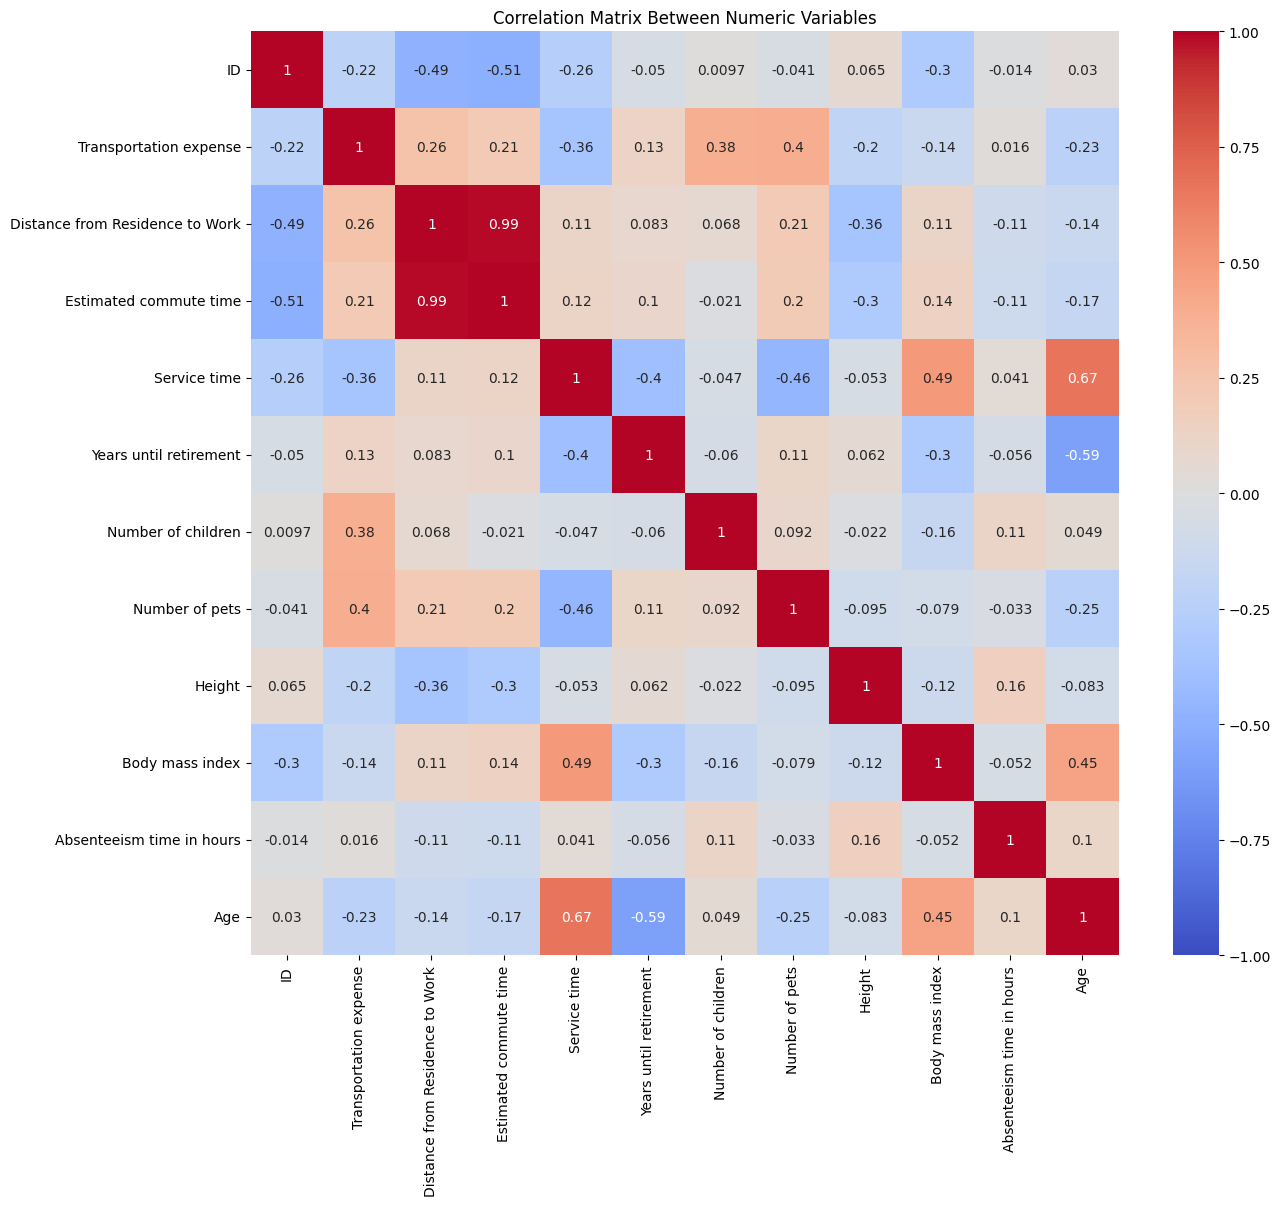

In [ ]:
corr_matrix = numeric_data.corr()

plt.figure(figsize=(14, 12))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix Between Numeric Variables')
plt.show()

# **3. Data Preprocessing**

In [ ]:
data3 = data2.copy()

In [ ]:
data3.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,...,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours,ReasonCat,Age,AgeCat
0,11,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,13.0,...,Yes,No,1,90,172,30,4,Unjustified,33,Established Adults
1,36,Unspecified,July,Tuesday,Winter,0.0,118,13,26,18.0,...,Yes,No,0,98,178,31,0,Unspecified,50,Seniors
2,3,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,18.0,...,Yes,No,0,89,170,31,2,Medical Appointment,38,Established Adults
3,7,Diseases of the eye and adnexa,July,Thursday,Winter,0.0,279,5,5,14.0,...,Yes,Yes,0,68,168,24,4,Disease,39,Established Adults
4,11,Medical consultation,July,Thursday,Summer,0.0,289,36,69,13.0,...,Yes,No,1,90,172,30,2,Medical Appointment,33,Established Adults


In [ ]:
data3.columns


Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Days since previous absence', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Date of Birth',
       'Disciplinary failure', 'Education', 'Number of children',
       'Social drinker', 'Social smoker', 'Number of pets', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'ReasonCat', 'Age',
       'AgeCat'],
      dtype='object')

## 3.1. Handling Missing Values

In [ ]:
total = data3.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total], axis=1, keys=['Total of Missing Values'])

missing_data = missing_data[missing_data['Total of Missing Values'] > 0]

print(missing_data)

                             Total of Missing Values
Month of absence                                  63
Seasons                                           62
Reason for absence                                60
Day of the week                                   60
Service time                                      28
Days since previous absence                       19


For the missing values in **"Service Time"**, we will fill those with the median Service Time of the corresponding Age. Since The variable "Age" is the one wich has the most correlation with "Service Time".

For the missing values in **"Reason for Absence"**, we will ignore them, since we will use the variable **"ReasonCat"** which already has the reason grouped into categories. This variable has a category "N/A" (that were previously missing values) but we will grouped them into the "Unspecified".

For the columns **"Seasons"** and **"Month of absence"**, we will prioritize mantining "Month of absence", since it is a more precise variable. In the Data Exploration phase we filled most missing values in "Month of absence" with the respective season, thus this 63 missing values are rows which have no season registered as well. We will impute the mode of "Month of absence" since we have no other way to fill these missing values.

The column **"Days since previous absence"** will also be removed, since the column holds no value (the data is only composed by "0").

For the missing values in **"Day of the week"**, we will check the month that those occurred, and fill the mode of the respective month.

In [ ]:
median_by_age = data3.groupby('Age')['Service time'].transform('median')

data3['Service time'] = data3['Service time'].fillna(median_by_age)

print(data3['Service time'].isnull().sum())

0


In [ ]:
data3['ReasonCat'] = data3['ReasonCat'].replace(['N/A'], 'Unspecified')

data3['ReasonCat'].value_counts()

,count
ReasonCat,
Medical Appointment,403
Disease,256
Unspecified,103
Unjustified,33
Pregnancy,5


In [ ]:
month_mode = data3['Month of absence'].mode()[0]

data3['Month of absence'] = data3['Month of absence'].fillna(month_mode)

data3['Month of absence'].value_counts()

,count
Month of absence,
March,150
February,72
October,71
July,67
May,64
November,63
August,54
June,54
September,53


In [ ]:
empty_lines = data3[data3['Day of the week'].isnull() & data3['Month of absence'].isnull()]

print(empty_lines)

Empty DataFrame
Columns: [ID, Reason for absence, Month of absence, Day of the week, Seasons, Days since previous absence, Transportation expense, Distance from Residence to Work, Estimated commute time, Service time, Years until retirement, Date of Birth, Disciplinary failure, Education, Number of children, Social drinker, Social smoker, Number of pets, Weight, Height, Body mass index, Absenteeism time in hours, ReasonCat, Age, AgeCat]
Index: []

[0 rows x 25 columns]


In [ ]:
mode_by_month = data3.groupby('Month of absence')['Day of the week'].transform(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan)

data3['Day of the week'] = data3['Day of the week'].fillna(mode_by_month)

print(data3['Day of the week'].isnull().sum())

0


/tmp/ipython-input-3702421488.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_by_month = data3.groupby('Month of absence')['Day of the week'].transform(


In [ ]:
total = data3.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total], axis=1, keys=['Total of Missing Values'])

missing_data = missing_data[missing_data['Total of Missing Values'] > 0]

print(missing_data)

                             Total of Missing Values
Seasons                                           62
Reason for absence                                60
Days since previous absence                       19


## 3.2. Selection

In [ ]:
data3.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Days since previous absence', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Date of Birth',
       'Disciplinary failure', 'Education', 'Number of children',
       'Social drinker', 'Social smoker', 'Number of pets', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'ReasonCat', 'Age',
       'AgeCat'],
      dtype='object')

In [ ]:
columns_to_drop = ['ID', 'Reason for absence', 'Seasons', 'Days since previous absence', 'Date of Birth', 'Weight', 'Height',
                  'Body mass index', 'AgeCat']

In [ ]:
data4 = data3.drop(columns_to_drop, axis=1)

data4.columns

Index(['Month of absence', 'Day of the week', 'Transportation expense',
       'Distance from Residence to Work', 'Estimated commute time',
       'Service time', 'Years until retirement', 'Disciplinary failure',
       'Education', 'Number of children', 'Social drinker', 'Social smoker',
       'Number of pets', 'Absenteeism time in hours', 'ReasonCat', 'Age'],
      dtype='object')

## 3.3. Feature Engineering

In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Month of absence                 800 non-null    category
 1   Day of the week                  800 non-null    object  
 2   Transportation expense           800 non-null    int64   
 3   Distance from Residence to Work  800 non-null    int64   
 4   Estimated commute time           800 non-null    int64   
 5   Service time                     800 non-null    float64 
 6   Years until retirement           800 non-null    int64   
 7   Disciplinary failure             800 non-null    object  
 8   Education                        800 non-null    object  
 9   Number of children               800 non-null    int64   
 10  Social drinker                   800 non-null    object  
 11  Social smoker                    800 non-null    object  
 12  Number o

Since **"Service Time"** is a variable that contains the years an employee has worked in the company, it should be of the data type "integer" instead of "float".

We will also transform the variables that contain 64 bits into 32 bit, ones to omptimize coding.

In [ ]:
data4['Service time'] = data4['Service time'].astype('int32')

In [ ]:
for c in data4.columns:
  if data4[c].dtype == 'int64':
    data4[c] = data4[c].astype('int32')

data4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Month of absence                 800 non-null    category
 1   Day of the week                  800 non-null    object  
 2   Transportation expense           800 non-null    int32   
 3   Distance from Residence to Work  800 non-null    int32   
 4   Estimated commute time           800 non-null    int32   
 5   Service time                     800 non-null    int32   
 6   Years until retirement           800 non-null    int32   
 7   Disciplinary failure             800 non-null    object  
 8   Education                        800 non-null    object  
 9   Number of children               800 non-null    int32   
 10  Social drinker                   800 non-null    object  
 11  Social smoker                    800 non-null    object  
 12  Number o

First, we will transform the values in binary variables (**"Social smoker", Social drinker"** and **"Disciplinary failure"**) **from "Yes to 1 and from "No" to 0**.

In [ ]:
binary_col = ['Social smoker', 'Social drinker', 'Disciplinary failure']
binary = {'Yes': 1, 'No': 0}

for c in binary_col:
    data4[c] = data4[c].map(binary)

print(data4[binary_col].head())

   Social smoker  Social drinker  Disciplinary failure
0              0               1                     0
1              0               1                     1
2              0               1                     0
3              1               1                     0
4              0               1                     0


### One-hot Encoding

We apply **One-Hot Encoding** to the **"ReasonCat"** variable (transforming it into multiple binary columns such as Reason_Disease, Reason_Pregnancy, etc.) is due to the nominal nature of this data.

Unlike ordinal variables (such as education level, where a clear hierarchy exists), there is no intrinsic order among the reasons for absence.

In [ ]:
dummies_reason = pd.get_dummies(data4['ReasonCat'], prefix='Reason', dtype=int)

data4 = pd.concat([data4, dummies_reason], axis=1)

data4 = data4.drop('ReasonCat', axis=1)

data4.head()

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Absenteeism time in hours,Age,Reason_Disease,Reason_Medical Appointment,Reason_Pregnancy,Reason_Unjustified,Reason_Unspecified
0,July,Tuesday,289,36,69,13,32,0,High School,2,1,0,1,4,33,0,0,0,1,0
1,July,Tuesday,118,13,26,18,15,1,High School,1,1,0,0,0,50,0,0,0,0,1
2,July,Wednesday,179,51,108,18,27,0,High School,0,1,0,0,2,38,0,1,0,0,0
3,July,Thursday,279,5,5,14,26,0,High School,2,1,1,0,4,39,1,0,0,0,0
4,July,Thursday,289,36,69,13,32,0,High School,2,1,0,1,2,33,0,1,0,0,0


### Data Scaling

Since we're dealing with different scales of data (e.g. number of childrem and body mass index) and we will be performing distance based algorithms, we need to perform a scaling function to normalize our data.

In [114]:
from sklearn.preprocessing import RobustScaler, StandardScaler

std_scaler = StandardScaler()

In [115]:
data_scaled = data4.copy()

numeric_var = ['Transportation expense', 'Distance from Residence to Work', 'Estimated commute time', 'Service time',
               'Years until retirement', 'Number of children', 'Number of pets', 'Absenteeism time in hours', 'Age',
               'Disciplinary failure', 'Social drinker', 'Social smoker']

In [116]:
scale = std_scaler.fit(data_scaled[numeric_var])

std_data = scale.transform(data_scaled[numeric_var])

std_data

array([[ 1.00502747,  0.41714995,  0.30852902, ..., -0.24124895,
         0.86413245, -0.27435163],
       [-1.55727   , -1.13002986, -1.06608545, ...,  4.14509568,
         0.86413245, -0.27435163],
       [-0.64323406,  1.42618026,  1.55527238, ..., -0.24124895,
         0.86413245, -0.27435163],
       ...,
       [-1.55727   , -1.06276118, -0.81034322, ..., -0.24124895,
         0.86413245, -0.27435163],
       [ 0.13594412,  0.34988126,  0.11672235, ..., -0.24124895,
         0.86413245, -0.27435163],
       [-0.64323406,  1.02256813,  0.82001348, ..., -0.24124895,
        -1.15723001, -0.27435163]])

In [117]:
data_scaled[numeric_var] = std_data

data_scaled.head()

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Absenteeism time in hours,Age,Reason_Disease,Reason_Medical Appointment,Reason_Pregnancy,Reason_Unjustified,Reason_Unspecified
0,July,Tuesday,1.005027,0.417150,0.308529,0.107133,0.567538,-0.241249,High School,0.853816,0.864132,-0.274352,0.192763,-0.221479,-0.520819,0,0,0,1,0
1,July,Tuesday,-1.557270,-1.130030,-1.066085,1.249889,-1.267582,4.145096,High School,-0.039063,0.864132,-0.274352,-0.563171,-0.508414,2.085192,0,0,0,0,1
2,July,Wednesday,-0.643234,1.426180,1.555272,1.249889,0.027797,-0.241249,High School,-0.931943,0.864132,-0.274352,-0.563171,-0.364946,0.245655,0,1,0,0,0
3,July,Thursday,0.855186,-1.668179,-1.737409,0.335684,-0.080152,-0.241249,High School,0.853816,0.864132,3.644957,-0.563171,-0.221479,0.398950,1,0,0,0,0
4,July,Thursday,1.005027,0.417150,0.308529,0.107133,0.567538,-0.241249,High School,0.853816,0.864132,-0.274352,0.192763,-0.364946,-0.520819,0,1,0,0,0


# 4. Clustering Analysis

In [ ]:
# Import packages
from sklearn.cluster import KMeans, AgglomerativeClustering

The purpose of this section is to perform different clustering techniques to find interesting patterns among the abseentism data provided.

The methodologies will include the following algorithsm:
1. K-Means: We will iterate K-means clustering and evaluate results with different number of clusters.
2. Hierarchical: This algorithm provides us with a hierarchy of clusters and represents them in a dendogram.

But first, we will do the obligatory feature selection, based on our previous assesment of the data structure.


## Step 4.1 Feature Selection

We will select the following features based on an assesment of what type of data are each of the columns in the original dataset.

In [118]:
#first, take a glimpse at the dataset after preprocessing it
data_scaled.dtypes

,0
Month of absence,category
Day of the week,object
Transportation expense,float64
Distance from Residence to Work,float64
Estimated commute time,float64
Service time,float64
Years until retirement,float64
Disciplinary failure,float64
Education,object
Number of children,float64


In [119]:
#separate between numeric and non-nuneric features

numeric_cols = data_scaled.select_dtypes(include=[np.number]).columns
feature_names = [col for col in numeric_cols]
X_prod = data_scaled[feature_names].copy() #dataset to perform clustering analysis with

print(f"✓ Selected {len(feature_names)} features for clustering")
print(f"  Features: {', '.join(feature_names[:15])}{'...' if len(feature_names) > 15 else ''}")

✓ Selected 17 features for clustering
  Features: Transportation expense, Distance from Residence to Work, Estimated commute time, Service time, Years until retirement, Disciplinary failure, Number of children, Social drinker, Social smoker, Number of pets, Absenteeism time in hours, Age, Reason_Disease, Reason_Medical Appointment, Reason_Pregnancy...


## Step 4.2 Selecting number of clusters

### 4.2.1 Elbow Method

We will select the number of cluster with the visual method, commonly referred as teh 'Elbow Method'.
To use the elbow method we must calculate the sum of squared errors (SSE) between each data point and the centroid of the cluster to which it was assigned. We do this for all values of k we want to analyze.
Then, we plot the values of k against the respective obtained SSE.

We are looking for the point in which the SSE sharply reduces, meaning the point where adding more clusters doesn't add significant difference.

In [120]:
ks = range(1, 10)
inertias = []

# provisional fillnan
# data_scaled.fillna(0, inplace = True)

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_prod)
    inertias.append(model.inertia_)

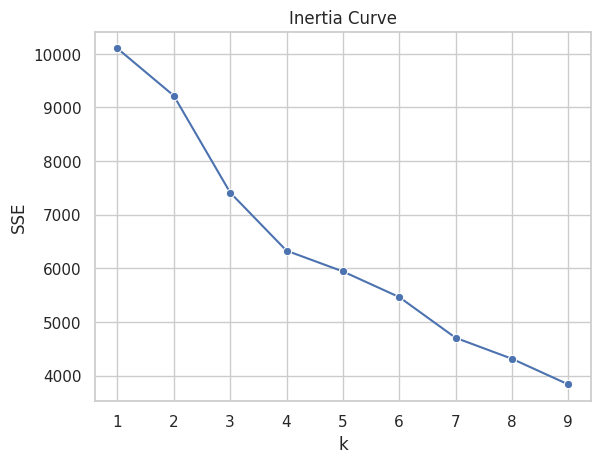

In [121]:
# Plot ks (x-axis) vs inertias (y-axis)
sns.lineplot(x=range(1, len(inertias) + 1), y=inertias, marker="o")
#plt.plot(ks, inertias)
plt.title('Inertia Curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

As we can see from the graph above, we can see a sharp decline in the SSE values until cluster number 5. So we could use this number of cluster.

### 4.2.2 Hierarchical Clustering

We will now apply a second analysis using hierarchical clustering, represented on a tree-shape structure called dendogram. We will compare these results with those above, to be sure about how many number of clusters we should be using.

In [122]:
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.cluster.hierarchy import dendrogram, linkage

def compute_r2_scores(X, ks=range(10, 0, -1), methods=['ward', 'complete', 'average', 'single']):
    r2_scores = {m: [] for m in methods}

    # Total sum of squares (fixed)
    centroid = np.mean(X, axis=0)
    ss_total = np.sum((X - centroid)**2)

    for method in methods:
        for k in ks:
            # Fit HC
            model = AgglomerativeClustering(n_clusters=k, linkage=method)
            labels = model.fit_predict(X)

            # Compute SS_within
            ss_within = 0
            for cluster_id in range(k):
                points = X[labels == cluster_id]
                if len(points) > 0:
                    cluster_centroid = np.mean(points, axis=0)
                    ss_within += np.sum((points - cluster_centroid)**2)

            r2 = (ss_total - ss_within) / ss_total
            r2_scores[method].append(r2)

    return r2_scores


In [123]:
def plot_r2_scores(r2_scores, ks=range(10, 0, -1)):
    sns.set(style="whitegrid", context="notebook")

    plt.figure(figsize=(12, 6))
    plt.title("R2 plot for various hierarchical methods", fontsize=18)

    markers = {
        'ward': 'o',
        'complete': 'o',
        'average': 'o',
        'single': 'o'
    }

    linestyles = {
        'ward': '-',
        'complete': '--',
        'average': ':',
        'single': '-.'
    }

    for method, scores in r2_scores.items():
        sns.lineplot(
            x=list(ks),
            y=scores,
            marker=markers[method],
            linestyle=linestyles[method],
            label=method
        )

    plt.xlabel("Number of clusters", fontsize=14)
    plt.ylabel("R2 metric", fontsize=14)
    plt.legend(title="HC methods")
    plt.tight_layout()
    plt.show()


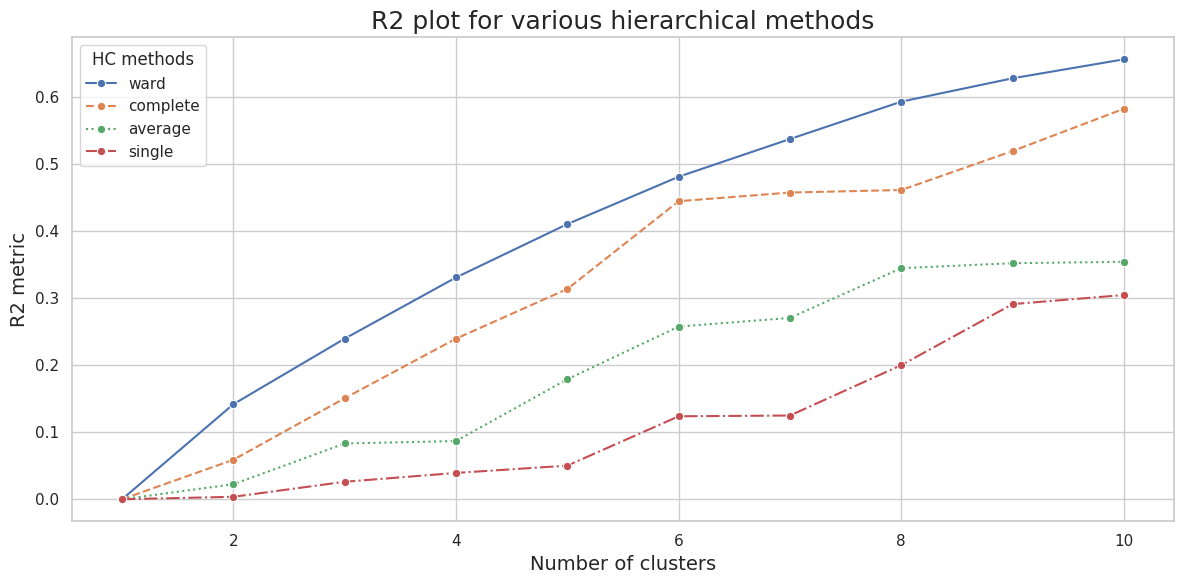

In [124]:
ks = range(10, 0, -1)
r2_scores = compute_r2_scores(X_prod.values, ks=ks)
plot_r2_scores(r2_scores, ks)

This graph reafirms us that Ward's linkage is the best method to decide the number of factors. According to the performance of this metric, it seems that between 4 to 6 clusters, the R2 metric stabilizes, so this number of clusters could help us retain the information that we need when applying clustering algorithms.

We will now visualize the dendrgoram for Ward's linkage in order to further confirm the number of clusters to use.

In [ ]:
# Using Ward Linkage: Minimum variance to minimize the within cluster variance
hclustering = linkage(X_prod, 'ward')

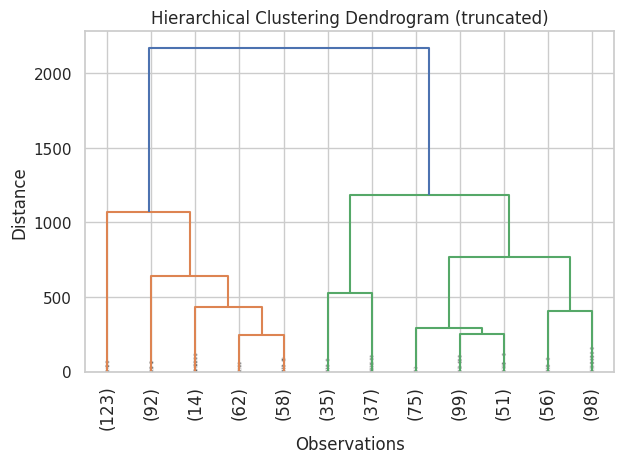

In [125]:
# plot dendogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.tight_layout()
plt.show()

We observe that the dendrogram seems to indicate that 4 is a good number of clusters.

### 4.2.3 Silhoutte Score

We will now apply a third criteria. We will measure the silhouette score for the different number of cluster

In [126]:
from sklearn.metrics import silhouette_score

In [127]:
def clusters_scores(X, cluster_algorithm, score_function):
    range_n_clusters = [4, 5, 6, 7, 8]
    scores =[]

    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = cluster_algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        score_avg = score_function(X, cluster_labels)
        scores.append(score_avg)

        print("For n_clusters =", n_clusters, "The average", score_function.__name__, "is :", score_avg)

    return scores

In [128]:
from sklearn.cluster import KMeans
k_means_silhouette = clusters_scores(X_prod, KMeans, silhouette_score)

For n_clusters = 4 The average silhouette_score is : 0.24396609573335554
For n_clusters = 5 The average silhouette_score is : 0.3029312616084954
For n_clusters = 6 The average silhouette_score is : 0.33066472211225784
For n_clusters = 7 The average silhouette_score is : 0.30705302307967314
For n_clusters = 8 The average silhouette_score is : 0.3587232583425465


In [133]:
def draw_scores(scores):
    sns.set(style="whitegrid", context="notebook")

    plt.figure(figsize=(5, 5))
    sns.lineplot(
        x=range(3,8),
        y=scores,
        marker="o",
        color="red",
        label="Silhouette Coefficient"
    )

    plt.title('Silhouette Score')
    plt.xlabel('Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(4, 9))
    plt.legend()
    plt.tight_layout()

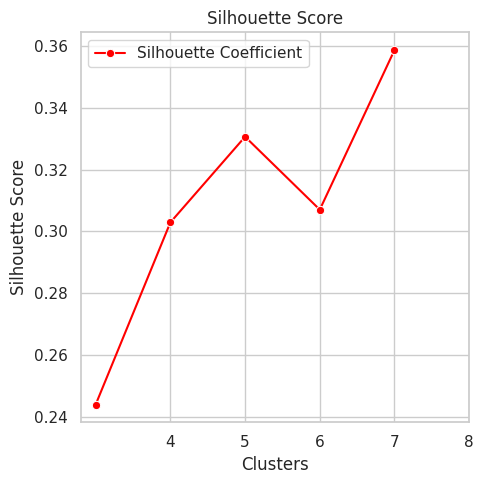

In [134]:
draw_scores(k_means_silhouette)

We can conclude from this graph, along with the elbow method, and the R2 score, that 5 seems to be a good number of clusters!

## Step 4 Applying K-means

In [148]:
model = KMeans(n_clusters=5, random_state=0)

In [149]:
model.fit(X_prod)

KMeans(n_clusters=5, random_state=0)

Label each column to the respective cluster:

In [150]:
X_prod['label'] = model.labels_
X_prod

,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Number of children,Social drinker,Social smoker,Number of pets,Absenteeism time in hours,Age,Reason_Disease,Reason_Medical Appointment,Reason_Pregnancy,Reason_Unjustified,Reason_Unspecified,label
0,1.005027,0.417150,0.308529,0.107133,0.567538,-0.241249,0.853816,0.864132,-0.274352,0.192763,-0.221479,-0.520819,0,0,0,1,0,1
1,-1.557270,-1.130030,-1.066085,1.249889,-1.267582,4.145096,-0.039063,0.864132,-0.274352,-0.563171,-0.508414,2.085192,0,0,0,0,1,0
2,-0.643234,1.426180,1.555272,1.249889,0.027797,-0.241249,-0.931943,0.864132,-0.274352,-0.563171,-0.364946,0.245655,0,1,0,0,0,4
3,0.855186,-1.668179,-1.737409,0.335684,-0.080152,-0.241249,0.853816,0.864132,3.644957,-0.563171,-0.221479,0.398950,1,0,0,0,0,0
4,1.005027,0.417150,0.308529,0.107133,0.567538,-0.241249,0.853816,0.864132,-0.274352,0.192763,-0.364946,-0.520819,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.005027,0.417150,0.308529,0.107133,0.567538,-0.241249,0.853816,0.864132,-0.274352,0.192763,0.065457,-0.520819,1,0,0,0,0,1
796,0.195881,-1.264567,-1.257892,0.335684,0.135745,-0.241249,-0.039063,-1.157230,-0.274352,0.192763,-0.221479,0.092360,1,0,0,0,0,2
797,-1.557270,-1.062761,-0.810343,0.107133,-0.188100,-0.241249,-0.039063,0.864132,-0.274352,5.484304,-0.508414,0.552244,0,0,0,0,1,3
798,0.135944,0.349881,0.116722,0.335684,-0.080152,-0.241249,0.853816,0.864132,-0.274352,0.948698,-0.508414,0.398950,0,0,0,0,1,1


### 4.1 Summary statistics for each cluster



In [151]:
descr = X_prod.reset_index(drop=True).groupby('label').describe()
print(descr.T)

label                                  0           1           2          3  \
Transportation expense count  201.000000  110.000000  316.000000  44.000000   
                       mean     0.165465    0.920571   -0.436348   1.698728   
                       std      0.970608    0.569897    0.788760   0.923578   
                       min     -1.557270    0.046039   -1.557270  -1.557270   
                       25%      0.090992    0.570486   -1.002855   2.083890   
...                                  ...         ...         ...        ...   
Reason_Unspecified     min      0.000000    0.000000    0.000000   0.000000   
                       25%      0.000000    0.000000    0.000000   0.000000   
                       50%      0.000000    0.000000    0.000000   0.000000   
                       75%      0.000000    0.000000    0.000000   0.000000   
                       max      1.000000    1.000000    1.000000   1.000000   

label                                  4  
Transpor

### 4.2 Visualizing K-Means

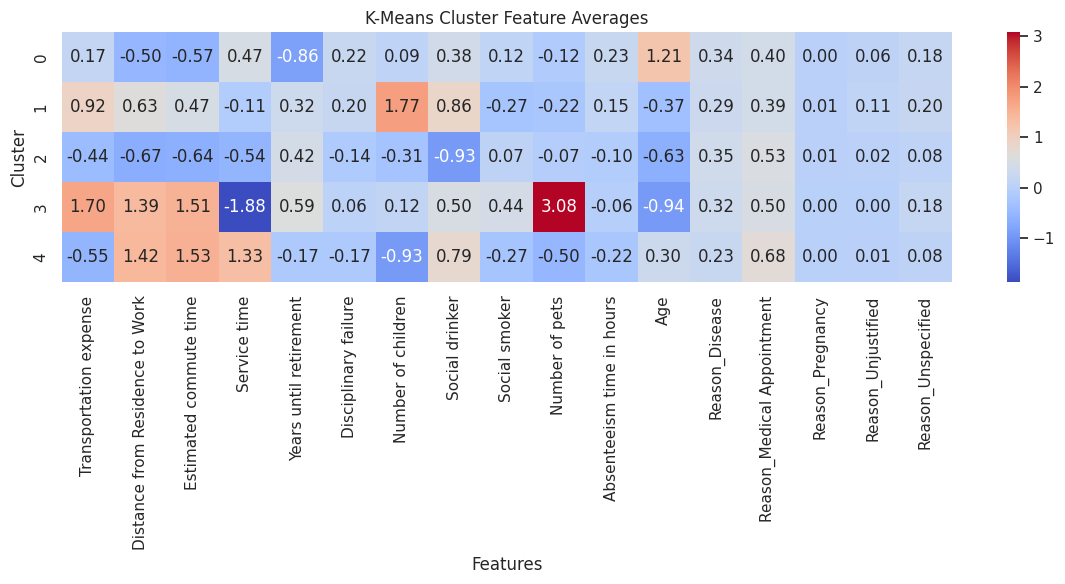

In [161]:
#display cluster means
cluster_means = X_prod.groupby('label').mean(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("K-Means Cluster Feature Averages")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

As we can see, clusters 0 and 1 seem to be 'low risk of abseentism' clusters, represented by young and nearby workers. Cluster 2 seems to be a "experienced, stable" set of workers.
Finally, clusters 3 and 4 are "high risk of abseentism" workers, with a higher transportation commute, family members, and years until retirement.

In [162]:
#define dfs for each cluster
clusters = {}

for label in X_prod['label'].unique():
    clusters[label] = X_prod[X_prod['label'] == label]


We can now start exploring relationshis between variables and clusters of workers more easily. We will do this by plotting scatterplkots bewtween centroids for each variable.

In [167]:
centroids = model.cluster_centers_

centroids_df = pd.DataFrame(
    centroids,
    columns=X_prod.columns,  # use column names
    index=[f'clusters{[i]}' for i in range(len(centroids))]
)

centroids_df.drop('label', axis = 1)

,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Disciplinary failure,Number of children,Social drinker,Social smoker,Number of pets,Absenteeism time in hours,Age,Reason_Disease,Reason_Medical Appointment,Reason_Pregnancy,Reason_Unjustified,Reason_Unspecified
clusters[0],0.165465,-0.503193,-0.574163,0.473270,-0.859956,0.217026,0.085318,0.381419,0.115629,-0.119389,0.230338,1.205844,0.343284,0.402985,4.975124e-03,0.064677,0.184080
clusters[1],0.920571,0.626906,0.473308,-0.113107,0.319257,0.197386,1.771048,0.864132,-0.274352,-0.219565,0.152190,-0.366131,0.290909,0.390909,9.090909e-03,0.109091,0.200000
clusters[2],-0.436348,-0.669793,-0.636038,-0.541634,0.424062,-0.144083,-0.307493,-0.933345,0.072929,-0.070378,-0.102981,-0.629969,0.351266,0.534810,9.493671e-03,0.022152,0.082278
clusters[3],1.698728,1.386431,1.514586,-1.877106,0.589618,0.057820,0.123278,0.496612,0.438250,3.079058,-0.055186,-0.938896,0.318182,0.500000,0.000000e+00,0.000000,0.181818
clusters[4],-0.553329,1.417315,1.532474,1.326073,-0.172200,-0.173244,-0.931943,0.785785,-0.274352,-0.504572,-0.217586,0.296753,0.232558,0.682171,1.474515e-17,0.007752,0.077519


Scatterplots between two features (dispersion within clusters)

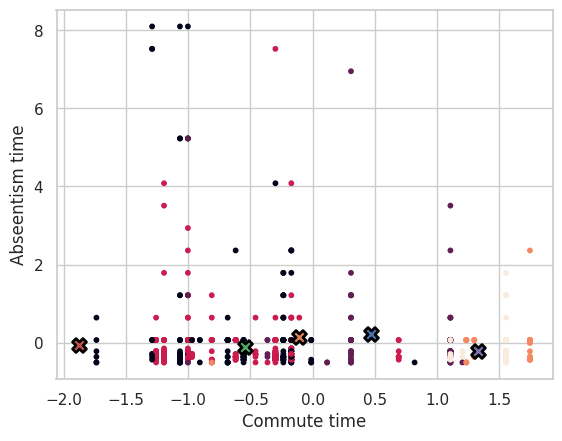

In [168]:
#create a subset with only the two features to compare
X_plot = X_prod[['Estimated commute time', 'Absenteeism time in hours']]

centroids_2d = centroids[:, [3, 10]]  # Extract only columns 3 and 10 from your full centroids

plt.scatter(X_prod['Estimated commute time'], X_prod['Absenteeism time in hours'],
            c=X_prod.label, s=10)
for i in range(len(centroids_2d)):
    plt.scatter(centroids_2d[i, 0], centroids_2d[i, 1], marker='X', s=100,
                edgecolors='black', linewidths=2)
plt.xlabel('Commute time')
plt.ylabel('Abseentism time')
plt.show()

t_SNE Visualization

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


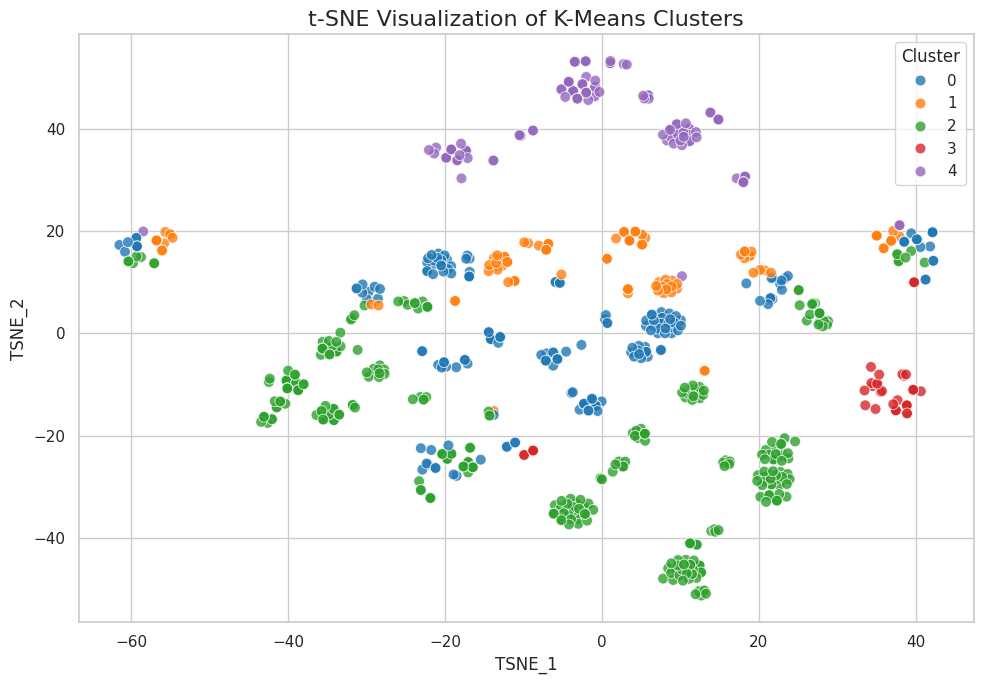

In [169]:
from sklearn.manifold import TSNE

features = X_prod.drop(columns=['label'])
labels = X_prod['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ----------------------------
# run t-SNE
# ----------------------------
tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=1000,
    random_state=42,
    learning_rate='auto'
)

X_tsne = tsne.fit_transform(X_scaled)

# ----------------------------
# create t-SNE df
# ----------------------------
tsne_df = pd.DataFrame({
    'TSNE_1': X_tsne[:, 0],
    'TSNE_2': X_tsne[:, 1],
    'Cluster': labels
})

# ----------------------------
# plot
# ----------------------------
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=tsne_df,
    x='TSNE_1',
    y='TSNE_2',
    hue='Cluster',
    palette='tab10',
    alpha=0.8,
    s=60
)

plt.title("t-SNE Visualization of K-Means Clusters", fontsize=16)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
